# Data preprocessing

In this Notebook we will prepare the data for the ML model and document everything properly! :)


## Imports

All necessary package installations and imports.

In [ ]:
!pip install emoji
!pip install -U spacy
!python3 -m spacy download de_core_news_sm

import spacy
import sklearn
import re
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import emoji as emo

from nltk.stem.snowball import GermanStemmer
from wordcloud import WordCloud,STOPWORDS 
from google.colab import drive

     |████████████████████████████████| 133kB 9.7MB/s 
     |████████████████████████████████| 6.4MB 7.4MB/s 
     |████████████████████████████████| 460kB 29.8MB/s 
     |████████████████████████████████| 10.1MB 32.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 624kB 33.4MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-07-17 01:06:14.053475: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 18.8M

Mount the google drive.

In [ ]:
drive.mount("/content/gdrive")

## Raw Data import

Import csv from project Github into a panda dataframe. The Link needs to be refreshed everytime.

In [ ]:
url = 'https://raw.githubusercontent.com/calinostoc/auto-emoji/main/data/raw/simulation_merged/core.messagemodel.csv?token=ALNZ3I4A6TEZIN2OLAYRU6DA5MFFG'
df_raw = pd.read_csv(url)

HTTPError: ignored

Save raw data to the google drive, so we do not need to load it from github everytime.

In [ ]:
# Upload the csv to your personal gdrive and adjust the link
df_raw.to_csv('/content/gdrive/MyDrive/Sentiment/raw_data_sim.csv', encoding='utf-8', index=False)

NameError: ignored

Copy of the data set so that the token does not have to be constantly reloaded if manipulations have been carried out on the data set and undone.

In [ ]:
df = df_raw.copy()
df

## Create conversation IDs

In [ ]:
'''Creates a conversation ID from user, recipient and sid'''
def create_conversation_id(user, recipient, sid):
  #Get first user number
  user1 = 0
  listUser1 = re.findall("a-z+", user)
  if len(listUser1) == 1:
    user1 = int(listUser1[0])
  #Get second user number
  user2 = 0
  listUser2 = re.findall("\d+", recipient)
  if len(listUser2) == 1:
    user2 = int(listUser2[0])
  #Concate unique id
  if user1 < user2:
    return 10000*sid + 100*user1 + user2
  else:
    return 10000*sid + 100*user2 + user1


df['conversation_id'] = df.apply(lambda x: create_conversation_id(x['user'], x['recipient'], x['sid']), axis=1)

## Data Insights

### Basic pandas insights
Print dataframe structure to get an overview.

In [ ]:
print("Shape of the raw data: ", df.shape)
print("Name of the columns: ", df.columns)
df.head(10)

Shape of the raw data:  (4215, 7)
Name of the columns:  Index(['id', 'user', 'recipient', 'sid', 'timestamp', 'body',
       'conversation_id'],
      dtype='object')


,id,user,recipient,sid,timestamp,body,conversation_id
0,2260,User02,user08,0,2021-06-14 20:17:39.470875+00:00,Ciao 🥰,208
1,2259,User02,user08,0,2021-06-14 20:17:34.522556+00:00,ich begebe mich jetzt mal auf Emojis Entzug .....,208
2,2258,user08,User02,0,2021-06-14 20:17:31.440223+00:00,Schön Abend dir noch!🥰😊,208
3,2257,User02,user08,0,2021-06-14 20:17:11.373674+00:00,"ach, das war doch lustig! 🥰 hab gedacht, dass ...",208
4,2256,user08,User02,0,2021-06-14 20:16:06.936529+00:00,"fand es ganz witzig, dass ich null auf die Sch...",208
5,2255,User02,user08,0,2021-06-14 20:15:52.713233+00:00,war echt lustig ... danke für die nette Unterh...,208
6,2254,user08,User02,0,2021-06-14 20:15:46.157493+00:00,ah freut mich 😊,208
7,2253,User02,user08,0,2021-06-14 20:15:33.653554+00:00,"auf sicher ... mit Bine, Konsti Mama 🥰",208
8,2252,User02,user08,0,2021-06-14 20:15:15.610304+00:00,sicher ... meinte ich 😊,208
9,2251,user08,User02,0,2021-06-14 20:15:08.852745+00:00,mit wem habe ich die Ehre?👀,208


Generate simple column informtion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4215 non-null   int64 
 1   user             4215 non-null   object
 2   recipient        4215 non-null   object
 3   sid              4215 non-null   int64 
 4   timestamp        4215 non-null   object
 5   body             4215 non-null   object
 6   conversation_id  4215 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 230.6+ KB


### Print messages grouped by scenario and participants

In [ ]:
for pair in pairs:
    user1 = "user" + str(pair[0])
    user2 = "user" + str(pair[1])
    #Printing all scenarios for two users
    scenarios = df[((df.user == user1) & (df.recipient == user2)) | ((df.user == user2) & (df.recipient == user1))].sid.unique()
    #print("All scenarios:", scenarios)
    #Printing DF for each of the scenarios
    for scenario in scenarios:
        print("User", pair[0], "and", pair[1], "scenario:", scenario)
        scenario_filter = \
        df[((df.user == user1) & (df.recipient == user2) & (df.sid == scenario)) | ((df.user == user2) & (df.recipient == user1) & (df.sid == scenario))][
            ["body", "recipient", "user", "sid"]]
         # print(scenario_filter, "\n")

NameError: ignored

In [ ]:
count_messages = []

# pairs need to be strings because leading 0 is not allowed in int
pairs = [("10", "15"), ("01", "16"), ("03", "04"), ("13", "19"), ("14", "07"), ("12", "18"), ("06", "17")]

# filter only messages for every pair
for pair in pairs:
    print("User", pair[0], "and", pair[1])
    user1 = "user" + str(pair[0])
    user2 = "user" + str(pair[1])
    filtered_df = df[((df.user == user1) & (df.recipient == user2)) | ((df.user == user2) & (df.recipient == user1))][["body", "recipient", "user"]]
    #print(filtered_df)
    count_messages.append(len(filtered_df))
# print(count_messages)

### Conversation Insights

Copy df for insight manipulations:

In [ ]:
df_ins = df.copy()

Count words per message:

In [ ]:
df_ins['word_count'] = df_ins['body'].apply(lambda x: len(x.split()))
df

,id,user,recipient,sid,timestamp,body,conversation_id
0,2260,User02,user08,0,2021-06-14 20:17:39.470875+00:00,Ciao 🥰,208
1,2259,User02,user08,0,2021-06-14 20:17:34.522556+00:00,ich begebe mich jetzt mal auf Emojis Entzug .....,208
2,2258,user08,User02,0,2021-06-14 20:17:31.440223+00:00,Schön Abend dir noch!🥰😊,208
3,2257,User02,user08,0,2021-06-14 20:17:11.373674+00:00,"ach, das war doch lustig! 🥰 hab gedacht, dass ...",208
4,2256,user08,User02,0,2021-06-14 20:16:06.936529+00:00,"fand es ganz witzig, dass ich null auf die Sch...",208
...,...,...,...,...,...,...,...
4210,2269,dpana,calinostoc,1,2021-06-16 14:00:10.922248+00:00,Beginne Szenario 1,10000
4211,2268,dpana,calinostoc,0,2021-06-16 14:00:06.028168+00:00,good thing the participants only see 4 users i...,0
4212,2267,calinostoc,dpana,0,2021-06-16 13:59:03.730245+00:00,the graph looks shitty when you have many user...,0
4213,2266,dpana,calinostoc,0,2021-06-16 13:58:24.800676+00:00,shit i'm talkin to myself👀,0


Count messages and words per conversation:

In [ ]:
gb = df_ins.groupby(['conversation_id'])
conv_ins = (gb.size().to_frame(name='messages')
  .join(gb.agg({'word_count': 'sum'}).rename(columns={'word_count': 'words'}))
  .join(gb.agg({'sid': 'mean'}).rename(columns={'sid': 'sid'}))
  .reset_index()
  .rename(columns={"conversation_id": "conversation"})
)
conv_ins

,conversation,messages,words,sid
0,0,4,30,0
1,16,1,9,0
2,107,8,28,0
3,208,55,384,0
4,309,2,5,0
...,...,...,...,...
205,280410,19,164,28
206,280511,16,121,28
207,280612,29,205,28
208,280714,29,276,28


### Szeanrio Insights
Get word and message insights per szenario:

In [ ]:
gb2 = conv_ins.groupby(['sid'])
msg_ins = (gb2.size().to_frame(name='count')
  .join(gb2.agg({'messages': 'sum'}).rename(columns={'messages': 'messages_sum'}))
  .join(gb2.agg({'messages': 'mean'}).rename(columns={'messages': 'messages_mean'}))
  .join(gb2.agg({'messages': 'min'}).rename(columns={'messages': 'messages_min'}))
  .join(gb2.agg({'messages': 'max'}).rename(columns={'messages': 'messages_max'}))
  .join(gb2.agg({'words': 'sum'}).rename(columns={'words': 'words_sum'}))
  .join(gb2.agg({'words': 'mean'}).rename(columns={'words': 'words_mean'}))
  .join(gb2.agg({'words': 'min'}).rename(columns={'words': 'words_min'}))
  .join(gb2.agg({'words': 'max'}).rename(columns={'words': 'words_max'}))
  .reset_index()
  .rename(columns={"sid": "szenario"})
)
msg_ins

,szenario,count,messages_sum,messages_mean,messages_min,messages_max,words_sum,words_mean,words_min,words_max
0,0,15,177,11.800000,1,55,1128,75.200000,5,384
1,1,12,180,15.000000,2,44,1442,120.166667,6,255
2,2,9,177,19.666667,3,37,1522,169.111111,8,383
3,3,8,170,21.250000,10,34,1677,209.625000,111,314
4,4,8,215,26.875000,13,55,1680,210.000000,140,430
5,5,8,172,21.500000,11,42,1883,235.375000,169,408
6,6,8,158,19.750000,11,34,1304,163.000000,109,263
7,7,8,193,24.125000,8,40,1395,174.375000,45,297
8,8,7,147,21.000000,11,39,1170,167.142857,85,318
9,9,7,187,26.714286,8,54,1508,215.428571,113,379


## Data Cleaning

### Sort Dataframe

In [ ]:
df = df.sort_values(by=['conversation_id', 'timestamp'], ignore_index=True)
df

,id,user,recipient,sid,timestamp,body,conversation_id
0,2265,calinostoc,dpana,0,2021-06-16 13:58:02.270702+00:00,ey bro😊,0
1,2266,dpana,calinostoc,0,2021-06-16 13:58:24.800676+00:00,shit i'm talkin to myself👀,0
2,2267,calinostoc,dpana,0,2021-06-16 13:59:03.730245+00:00,the graph looks shitty when you have many user...,0
3,2268,dpana,calinostoc,0,2021-06-16 14:00:06.028168+00:00,good thing the participants only see 4 users i...,0
4,534,user16,Konsti,0,2021-06-14 18:45:57.400561+00:00,Hetze gegen die Lügenpresse ist ja erlaubt ode...,16
...,...,...,...,...,...,...,...
4210,2220,user14,user13,28,2021-06-14 20:09:50.906268+00:00,Vielen Dank! 🥰 Das nächste Abendessen geht auf...,281314
4211,2222,user13,user14,28,2021-06-14 20:10:07.976085+00:00,Nein! Wir sind dann einfach quitt! Du hast mir...,281314
4212,2224,user13,user14,28,2021-06-14 20:10:26.161661+00:00,Abendessen hört sich trotzdem gut an! 🥰,281314
4213,2225,user14,user13,28,2021-06-14 20:10:29.128233+00:00,"Stimmt, das hätte ich fast vergessen! 🥰 Danke! 🥰",281314


### Remove messages not related to a scenario

In [ ]:
print("Sum over sid == 0:", sum(df['sid'] == 0))
df = df[df.sid != 0]

Sum over sid == 0: 177


### Drop rows where body "Beginne Szenario X" and "Szenario X beendet"

In [ ]:
print(len(df)) #2090
i = 1
dummy_list = []
while i < 29:
  dummy_list.append(df[df.body == "Beginne Szenario %s" % (i)])
  dummy_list.append(df[df.body == "Szenario %s beendet" % (i)])

  df = df[df.body != "Beginne Szenario %s" % (i)]
  df = df[df.body != "Szenario %s beendet" % (i)]
  i += 1

print(dummy_list)
print(len(df))

4038
[       id    user  ...                body  conversation_id
177  2269   dpana  ...  Beginne Szenario 1            10000
179    68  Konsti  ...  Beginne Szenario 1            10007
181  2271    feli  ...  Beginne Szenario 1            10018
185    93  user01  ...  Beginne Szenario 1            10107
197    89  User02  ...  Beginne Szenario 1            10208
220  2277  user03  ...  Beginne Szenario 1            10304
232   182  user03  ...  Beginne Szenario 1            10309
249  2278  user15  ...  Beginne Szenario 1            11015
293  2316  user12  ...  Beginne Szenario 1            11218
319   233  user13  ...  Beginne Szenario 1            11314
321  2291  user13  ...  Beginne Szenario 1            11319
349    91  user15  ...  Beginne Szenario 1            11516

[12 rows x 7 columns],        id    user  ...                body  conversation_id
178  2270   dpana  ...  Szenario 1 beendet            10000
180    72  Konsti  ...  Szenario 1 beendet            10007
184  2274 

In [ ]:
df.head(10)

,id,user,recipient,sid,timestamp,body,conversation_id
182,2272,feli,user18,1,2021-06-16 14:29:58.947146+00:00,hey 😡,10018
183,2273,user18,feli,1,2021-06-16 14:30:34.531218+00:00,Hey👀,10018
186,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,"Hey, sag mal wo bleibst du denn? Du bist zieml...",10107
187,110,user07,user01,1,2021-06-14 18:24:06.869530+00:00,Ohje habe deine Nachricht eben erste gesehen. ...,10107
188,119,user01,user07,1,2021-06-14 18:24:37.940971+00:00,Was? Warum das denn? 😲 Ich bin schon da...,10107
189,127,user07,user01,1,2021-06-14 18:25:28.572319+00:00,Vor meiner Haustüre ist Glatteis und ich bin a...,10107
190,129,user07,user01,1,2021-06-14 18:25:45.132193+00:00,Dort angekommen habe ich gerade deine Nachrich...,10107
191,135,user01,user07,1,2021-06-14 18:26:07.838446+00:00,Oh nein 😱😲😢 Gehts dir jetzt wieder besser?,10107
192,150,user07,user01,1,2021-06-14 18:27:03.370118+00:00,"Leider nicht, deswegen kann ich heute leider n...",10107
193,152,user01,user07,1,2021-06-14 18:27:08.390657+00:00,Dann verschieben wir das mit dem Kino und gehe...,10107


### Extract emojis and parse them to text representation

In [ ]:
EMOJIS = {'😊': 'joy', '🥰': 'trust', '😱': 'fear', '😲': 'surprise', '😢': 'sadness', '🤢': 'disgust', '😡': 'anger', '👀': 'anticipation'}

#generates columns for each emoji
#replaces emoji in body if found
#adds 1 on according emoji column if found in body
def extract_emoji(df):
    for emoji_text in EMOJIS.values():
        df[emoji_text] = 0

    for index, row in df['body'].iteritems():
        for emoji, emoji_text in EMOJIS.items():
            if emoji in row:
                df['body'][index] = df['body'][index].replace(emoji, "")
                df[emoji_text][index] = 1
            else:
                df[emoji_text][index] = 0

#Rename emoji columns
extract_emoji(df)
df.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,user,recipient,sid,timestamp,body,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
182,2272,feli,user18,1,2021-06-16 14:29:58.947146+00:00,hey,10018,0,0,0,0,0,0,1,0
183,2273,user18,feli,1,2021-06-16 14:30:34.531218+00:00,Hey,10018,0,0,0,0,0,0,0,1
186,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,"Hey, sag mal wo bleibst du denn? Du bist zieml...",10107,0,0,0,0,1,0,1,0
187,110,user07,user01,1,2021-06-14 18:24:06.869530+00:00,Ohje habe deine Nachricht eben erste gesehen. ...,10107,0,0,0,0,1,0,0,0
188,119,user01,user07,1,2021-06-14 18:24:37.940971+00:00,Was? Warum das denn? Ich bin schon da...,10107,0,0,0,1,0,0,0,0
189,127,user07,user01,1,2021-06-14 18:25:28.572319+00:00,Vor meiner Haustüre ist Glatteis und ich bin a...,10107,0,0,0,1,1,0,0,0
190,129,user07,user01,1,2021-06-14 18:25:45.132193+00:00,Dort angekommen habe ich gerade deine Nachrich...,10107,0,0,0,0,1,0,0,0
191,135,user01,user07,1,2021-06-14 18:26:07.838446+00:00,Oh nein Gehts dir jetzt wieder besser?,10107,0,0,1,1,1,0,0,0
192,150,user07,user01,1,2021-06-14 18:27:03.370118+00:00,"Leider nicht, deswegen kann ich heute leider n...",10107,0,0,0,0,1,0,0,0
193,152,user01,user07,1,2021-06-14 18:27:08.390657+00:00,Dann verschieben wir das mit dem Kino und gehe...,10107,1,0,0,0,0,0,0,0


### Removal of punctuation
(not used anymore)

In [ ]:
# Remove the punctuation
#df['body'] = df['body'].str.replace(r'[^\w\s]+', '')

### Removal of unnecessary white spaces


In [ ]:
df['body'] = df['body'].str.strip()
df.head()

,id,user,recipient,sid,timestamp,body,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
182,2272,feli,user18,1,2021-06-16 14:29:58.947146+00:00,hey,10018,0,0,0,0,0,0,1,0
183,2273,user18,feli,1,2021-06-16 14:30:34.531218+00:00,Hey,10018,0,0,0,0,0,0,0,1
186,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,"Hey, sag mal wo bleibst du denn? Du bist zieml...",10107,0,0,0,0,1,0,1,0
187,110,user07,user01,1,2021-06-14 18:24:06.869530+00:00,Ohje habe deine Nachricht eben erste gesehen. ...,10107,0,0,0,0,1,0,0,0
188,119,user01,user07,1,2021-06-14 18:24:37.940971+00:00,Was? Warum das denn? Ich bin schon da...,10107,0,0,0,1,0,0,0,0


### Wordcloud before stopward removal

hey Hey Hey, sag mal wo bleibst du denn? Du bist ziemlich spät dran und es ist echt ganz schön kalt Ohje habe deine Nachricht eben erste gesehen. Leider geht es mir heute gar nicht gut und ich muss dir wohl absagen Was? Warum das denn?  Ich bin schon da... Vor meiner Haustüre ist Glatteis und ich bin ausgerutscht und so blöd auf mein Steißbein gefallen, dass ich sogar ins Krankenhaus musste Dort angekommen habe ich gerade deine Nachricht gesehen... Oh nein  Gehts dir jetzt wieder besser? Leider nicht, deswegen kann ich heute leider nicht zum Kino kommen, tut mir leid... Dann verschieben wir das mit dem Kino und gehen gemeinsam in den Film wenn es dir wieder gut geht! Gute Besserung! Super, so machen wir das! Dankesehr hey liebe Freundin... steh vor dem Kino und friere kommst du noch huhu... Hey Du, tut mir leid, bin grad im Krankenhaus. weh ... im Ernst ich steh nämlich hier in der Kälte und war am erfrieren .. aber was ist los mach mir sorgen Vorhin als ich grad losgehen wollte, bin i

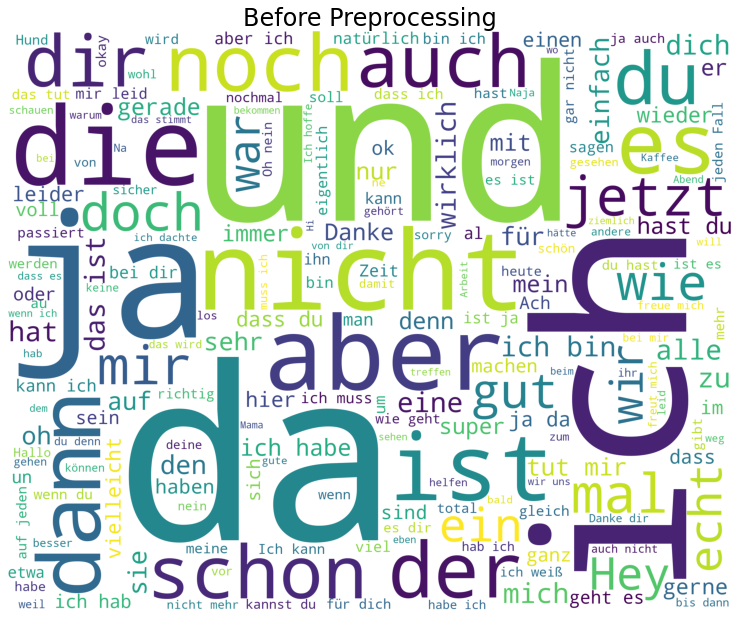

In [ ]:
def wordcloud_draw(data, title, color='black'):
    words = ' '.join(data)
    print(words)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'fontsize':24})
    plt.axis('off')
    plt.show()

wordcloud_draw(df['body'], "Before Preprocessing", 'white')

### Lowercasing

In [ ]:
# Remove upper cases
df['body'] = df['body'].apply(lambda x:x.lower())
df.head()


,id,user,recipient,sid,timestamp,body,conversation_id,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
182,2272,feli,user18,1,2021-06-16 14:29:58.947146+00:00,hey,10018,0,0,0,0,0,0,1,0
183,2273,user18,feli,1,2021-06-16 14:30:34.531218+00:00,hey,10018,0,0,0,0,0,0,0,1
186,102,user01,user07,1,2021-06-14 18:23:20.454133+00:00,"hey, sag mal wo bleibst du denn? du bist zieml...",10107,0,0,0,0,1,0,1,0
187,110,user07,user01,1,2021-06-14 18:24:06.869530+00:00,ohje habe deine nachricht eben erste gesehen. ...,10107,0,0,0,0,1,0,0,0
188,119,user01,user07,1,2021-06-14 18:24:37.940971+00:00,was? warum das denn? ich bin schon da...,10107,0,0,0,1,0,0,0,0


### Removal of stop words | Tokenization with spaCy | (Stemming)
Stemming is not activated


In [ ]:
# Tokenization, stop words removal, stemming and removal of empty strings

sp = spacy.load('de_core_news_sm')
all_stopwords = ['zehntes', 'dein', 'derselben', 'habe', 'das', 'zwar', 'wahr', 'wie', 'kannst', 'drittes', 'aber', 'konnte', 'hätten', 'will', 'andern', 'oder', 'währenddessen', 'seine', 'hin', 'wollten', 'daß', 'fünften', 'sagt', 'geschweige', 'mancher', 'darum', 'vielen', 'solang', 'jedermann', 'demgemäss', 'jeder', 'jede', 'haben', 'viele', 'vom', 'besser', 'jahr', 'können', 'jemand', 'währenddem', 'siebentes', 'dementsprechend', 'könnt', 'allein', 'musst', 'darüber', 'achte', 'vergangene', 'zugleich', 'durfte', 'hoch', 'mehr', 'außerdem', 'dürfen', 'aus', 'ihr', 'solcher', 'keinem', 'vergangenen', 'weiteren', 'nichts', 'früher', 'nach', 'seiner', 'erster', 'erstes', 'trotzdem', 'weitere', 'kleine', 'demselben', 'so', 'darunter', 'es', 'meinem', 'besonders', 'solchen', 'zehnter', 'grossen', 'meinen', 'welche', 'mögen', 'schlecht', 'wegen', 'wenig', 'unsere', 'zeit', 'damals', 'dermassen', 'natürlich', 'neunter', 'genug', 'erste', 'gemocht', 'neuen', 'denen', 'kommt', 'kann', 'kein', 'neuntes', 'warum', 'musste', 'gern', 'wirst', 'alle', 'machte', 'dazu', 'ging', 'gutes', 'machen', 'ach', 'diejenige', 'ganze', 'dieses', 'mein', 'na', 'neunten', 'dritter', 'bereits', 'sechster', 'allen', 'ihnen', 'dazwischen', 'einiger', 'über', 'en', 'mich', 'von', 'werden', 'kaum', 'ihrem', 'dagegen', 'nie', 'ausserdem', 'neue', 'ob', 'sein', 'tat', 'anderen', 'deine', 'danach', 'groß', 'jedoch', 'wurden', 'seinem', 'zweiten', 'durch', 'achter', 'einen', 'deswegen', 'damit', 'rechte', 'möchte', 'daran', 'keiner', 'magst', 'auch', 'vielem', 'derjenigen', 'anders', 'kurz', 'dort', 'sondern', 'um', 'ins', 'neun', 'dasein', 'meines', 'großer', 'wird', 'tag', 'einmaleins', 'sei', 'zehnten', 'tage', 'ihren', 'als', 'davor', 'acht', 'große', 'eigener', 'geworden', 'siebente', 'denselben', 'allgemeinen', 'dritten', 'meine', 'wann', 'gar', 'vielleicht', 'gut', 'hat', 'demgegenüber', 'mag', 'eines', 'weniger', 'zunächst', 'statt', 'anderem', 'könnte', 'dafür', 'beide', 'keinen', 'jeden', 'infolgedessen', 'niemandem', 'leicht', 'jenes', 'gerade', 'grosser', 'irgend', 'jahre', 'dieser', 'wo', 'jene', 'willst', 'ehrlich', 'allerdings', 'jedermanns', 'waren', 'seid', 'deiner', 'ab', 'jedem', 'sechs', 'vier', 'hätte', 'während', 'bisher', 'ganzes', 'manche', 'kommen', 'muß', 'diesem', 'dieselben', 'demzufolge', 'ganzer', 'niemanden', 'bist', 'rechter', 'denn', 'tagen', 'wessen', 'immer', 'dahin', 'habt', 'siebtes', 'im', 'dieselbe', 'niemand', 'sehr', 'desselben', 'offen', 'solches', 'bei', 'wenn', 'elf', 'diejenigen', 'einige', 'sollen', 'wollte', 'weniges', 'dasselbe', 'wollen', 'siebter', 'du', 'seines', 'des', 'dies', 'weil', 'seien', 'besten', 'und', 'mochten', 'vierte', 'eigenen', 'á', 'jahren', 'mit', 'erst', 'zuerst', 'euch', 'dahinter', 'zu', 'auf', 'an', 'seit', 'wir', 'bin', 'gibt', 'sah', 'man', 'darfst', 'dabei', 'ebenso', 'ihn', 'wieder', 'sich', 'andere', 'werde', 'würden', 'jenem', 'hatte', 'sechsten', 'solchem', 'sagte', 'derjenige', 'gross', 'großes', 'seinen', 'einmal', 'richtig', 'ersten', 'etwa', 'unserer', 'weiter', 'den', 'war', 'worden', 'vierten', 'zusammen', 'geht', 'doch', 'manchen', 'gemacht', 'hast', 'gehen', 'satt', 'oben', 'dadurch', 'macht', 'ohne', 'wer', 'leider', 'her', 'wenigstens', 'hinter', 'je', 'vor', 'für', 'alles', 'eine', 'drin', 'demgemäß', 'sechste', 'zwischen', 'was', 'diese', 'sind', 'wohl', 'zur', 'dem', 'ja', 'nun', 'viel', 'dessen', 'rund', 'meiner', 'ganzen', 'nachdem', 'noch', 'soll', 'tel', 'wirklich', 'dank', 'sie', 'uns', 'welchen', 'deinem', 'wenige', 'fünfte', 'deshalb', 'weiteres', 'dritte', 'drei', 'gedurft', 'siebenten', 'gekannt', 'am', 'manchem', 'der', 'deren', 'hatten', 'kleinen', 'kleines', 'beispiel', 'kleiner', 'jemandem', 'lange', 'er', 'wen', 'mir', 'eigene', 'sieben', 'gewollt', 'also', 'großen', 'bald', 'endlich', 'möglich', 'gekonnt', 'in', 'mittel', 'solche', 'bekannt', 'später', 'grosses', 'nur', 'neunte', 'ein', 'übrigens', 'zwei', 'keine', 'muss', 'einiges', 'schon', 'eigen', 'welchem', 'nahm', 'heißt', 'ganz', 'los', 'nein', 'eigenes', 'manches', 'oft', 'heute', 'siebenter', 'zweiter', 'darauf', 'jenen', 'allem', 'dass', 'sechstes', 'durften', 'siebten', 'wäre', 'daher', 'gemusst', 'derselbe', 'wart', 'mussten', 'jemanden', 'teil', 'einander', 'selbst', 'würde', 'einigen', 'jener', 'recht', 'viertes', 'zwanzig', 'guter', 'mögt', 'uhr', 'a', 'die', 'zurück', 'rechtes', 'aller', 'dich', 'fünf', 'jetzt', 'lieber', 'dermaßen', 'sollten', 'weit', 'wollt', 'diesen', 'grosse', 'daselbst', 'ihrer', 'unter', 'etwas', 'gab', 'ist', 'morgen', 'sowie', 'überhaupt', 'sollte', 'achten', 'dann', 'einer', 'dürft', 'zehnte', 'gute', 'neben', 'gesagt', 'beim', 'welches', 'unser', 'außer', 'gegenüber', 'seitdem', 'werdet', 'müsst', 'zweite', 'fünftes', 'ausser', 'bis', 'da', 'daraus', 'indem', 'ich', 'müssen', 'fünfter', 'heisst', 'gehabt', 'einem', 'siebte', 'mochte', 'gleich', 'darf', 'ihm', 'ende', 'ihres', 'achtes', 'sonst', 'davon', 'daneben', 'wem', 'ag', 'zehn', 'wurde', 'zweites', 'entweder', 'nicht', 'eben', 'hier', 'ihre', 'gewesen', 'gegen', 'konnten', 'vierter', 'welcher', 'darin', 'beiden', 'durchaus', 'lang', 'rechten', 'zum', 'kam', 'dir', 'tun']
stemmer = GermanStemmer()

def get_tokens(body):
  body_tokens = sp.tokenizer(body)
  string_tokens = []
  for word in body_tokens:
      if not (str(word) in all_stopwords or str(word) in ('',' ')):
        #stemmer.stem(str(word))
        string_tokens.append(str(word))
  return string_tokens

df['tokens'] = df['body'].apply(get_tokens)

#tokenization(df)
df.head(100)

NameError: ignored

## Emoji Insights

Slice Emoji columns

In [ ]:
df_corr = df_copy[EMOJIS.values()]
print(df_corr)
df_corr.shape

Count different emojis

In [ ]:
df_corr.sum(skipna = True)

In [ ]:
df_trustjoy = df[(df.trust == df.joy) & (df.trust == 1)]
df_trustjoy

In [ ]:
deigentl = df[df['body'].str.contains("eigentl")]
deigentl

### Correlation Matrix 

In [ ]:
corr = df_corr.astype('float64').corr()
sn.heatmap(corr, annot=True)
plt.show()

NameError: ignored

In [ ]:
flat_list = [item for sublist in df['tokens'] for item in sublist]
wordcloud_draw(flat_list, "After Preprocessing", 'white')

## Export of CSV

In [ ]:
# Choose one of the following: 
# Find the exported csv-file on the left  side in "Dateien"

# Option 1: CSV without preceding indeces of each row
df.to_csv('/content/gdrive/MyDrive/Sentiment/clean_data_nostem.csv', encoding='utf-8', index=False)
#df_corr.to_csv('df_corr.csv', encoding='utf-8', index=False)

#Option 2: CSV with preceding indeces
#df.to_csv('clean_data_indeces.csv', encoding='utf-8')

